Data visualization plot saved to 'gdp_vs_life_satisfaction.png'

--- Training Linear Regression Model ---
Prediction for Cyprus (Linear Regression): 5.9624

--- Training K-Nearest Neighbors Model ---
Prediction for Cyprus (K-Nearest Neighbors, k=3): 5.7667


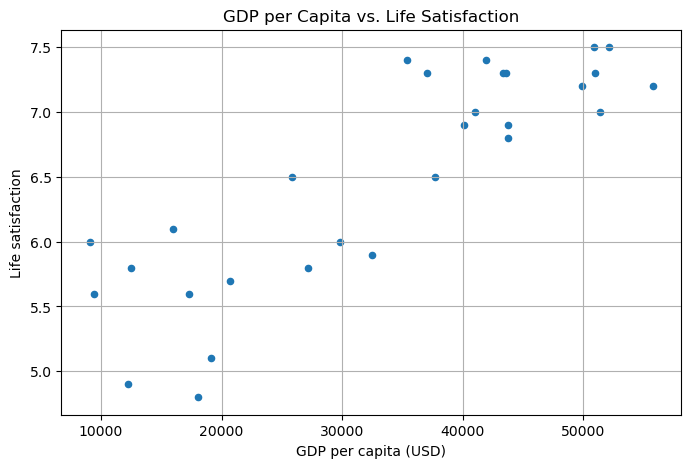

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors
import urllib.request

# --- 1. DATA FETCHING ---
datapath = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/"
oecd_bli_url = datapath + "oecd_bli_2015.csv"
gdp_per_capita_url = datapath + "gdp_per_capita.csv"

# Download the files to a temporary location
urllib.request.urlretrieve(oecd_bli_url, "oecd_bli_2015.csv")
urllib.request.urlretrieve(gdp_per_capita_url, "gdp_per_capita.csv")

# Load the data into pandas DataFrames
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")


# --- 2. DATA PREPARATION ---
def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Merges OECD and GDP per capita data, filters for 'Life satisfaction',
    and prepares the final DataFrame for analysis.
    """
    # Filter OECD data for the 'Life satisfaction' indicator
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    # Clean up and rename columns in GDP data
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    # Merge the two datasets
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

    # Sort by GDP per capita for clarity
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    # Select the relevant columns
    # We remove some outlier countries for a better model fit, as done in the book
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    # Return the final prepared data
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the final data for modeling
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


# --- 3. VISUALIZATION ---
# Visualize the data with a scatter plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.title('GDP per Capita vs. Life Satisfaction')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)
# Instead of plt.show(), we save the figure to a file.
plt.savefig("gdp_vs_life_satisfaction.png")
print("Data visualization plot saved to 'gdp_vs_life_satisfaction.png'")


# --- 4. MODEL TRAINING AND PREDICTION ---
# The GDP per capita of Cyprus is $22,587
X_new = [[22587]]

# --- Model 1: Linear Regression ---
print("\n--- Training Linear Regression Model ---")
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()
# Train the model
lin_reg_model.fit(X, y)
# Make a prediction for Cyprus
prediction_lin = lin_reg_model.predict(X_new)
print(f"Prediction for Cyprus (Linear Regression): {prediction_lin[0][0]:.4f}")


# --- Model 2: K-Nearest Neighbors Regression ---
print("\n--- Training K-Nearest Neighbors Model ---")
# Select a KNN model with k=3
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model
knn_model.fit(X, y)
# Make a prediction for Cyprus
prediction_knn = knn_model.predict(X_new)
print(f"Prediction for Cyprus (K-Nearest Neighbors, k=3): {prediction_knn[0][0]:.4f}")

# Prediksi Tingkat Kepuasan Hidup Berdasarkan PDB per Kapita

Proyek ini bertujuan untuk memprediksi tingkat kepuasan hidup suatu negara berdasarkan data Produk Domestik Bruto (PDB) per kapita. Kode ini menggunakan dua model machine learning yang berbeda dari library Scikit-Learn untuk perbandingan: Regresi Linear dan K-Nearest Neighbors (KNN).

## Penjelasan Kode

Skrip Python dibagi menjadi empat bagian utama:

### 1. Pengambilan Data (Data Fetching)

- Kode ini mengambil dua set data yang diperlukan dari repositori publik di GitHub.
    - `oecd_bli_2015.csv`: Berisi data "Better Life Index" dari OECD, yang mencakup indikator kepuasan hidup (Life satisfaction).
    - `gdp_per_capita.csv`: Berisi data PDB per kapita dari IMF.
- Menggunakan `urllib.request`, skrip mengunduh file-file ini dan menyimpannya secara lokal untuk diproses.

### 2. Persiapan Data (Data Preparation)

- Sebuah fungsi `prepare_country_stats` dibuat untuk membersihkan dan menggabungkan kedua set data.
- **Pembersihan Data:**
    - Data OECD difilter untuk hanya mengambil indikator `Life satisfaction` dengan nilai total (`INEQUALITY="TOT"`).
    - Data PDB per kapita dibersihkan dan nama kolomnya disesuaikan.
- **Penggabungan Data:** Kedua DataFrame digabungkan menjadi satu (`country_stats`) berdasarkan nama negara.
- **Penghapusan Outlier:** Beberapa negara yang dianggap sebagai outlier dihapus untuk mendapatkan model yang lebih akurat sesuai dengan contoh aslinya.
- **Finalisasi:** Data akhir (X untuk PDB per kapita dan y untuk Kepuasan Hidup) disiapkan untuk dimasukkan ke dalam model.

### 3. Visualisasi Data (Data Visualization)

- Untuk memahami hubungan antara PDB per kapita dan kepuasan hidup, sebuah scatter plot (diagram tebar) dibuat menggunakan `matplotlib`.
- Plot ini menunjukkan korelasi positif: semakin tinggi PDB per kapita suatu negara, cenderung semakin tinggi pula tingkat kepuasan hidupnya.
- Visualisasi ini disimpan sebagai file gambar `gdp_vs_life_satisfaction.png`.

### 4. Pelatihan Model dan Prediksi (Model Training and Prediction)

- Kode ini melatih dua model machine learning untuk memprediksi kepuasan hidup Siprus, yang memiliki PDB per kapita sebesar $22,587.
- **Model 1: Regresi Linear (LinearRegression)**
    - Model ini mencoba menemukan hubungan linear (garis lurus) terbaik yang cocok dengan data.
    - Setelah dilatih, model memprediksi kepuasan hidup Siprus berdasarkan tren garis lurus dari keseluruhan data.
- **Model 2: K-Nearest Neighbors (KNeighborsRegressor)**
    - Model ini adalah contoh instance-based learning. Ia tidak mencoba membuat model umum, tetapi menggunakan titik data yang sudah ada.
    - Dengan `n_neighbors=3`, model mencari 3 negara dalam data pelatihan yang memiliki PDB per kapita paling mirip dengan Siprus.
    - Prediksi untuk Siprus adalah rata-rata dari tingkat kepuasan hidup ketiga negara terdekat tersebut.

## Kesimpulan

-   Kode ini berhasil mendemonstrasikan bagaimana dua jenis model *machine learning* dapat digunakan untuk tugas regresi.
-   Regresi Linear memberikan prediksi berdasarkan tren umum data, menghasilkan nilai \~5.96. Ini adalah pendekatan berbasis model (*model-based*).
-   K-Nearest Neighbors memberikan prediksi berdasarkan kemiripan dengan data yang sudah ada, menghasilkan nilai \~5.77. Ini adalah pendekatan berbasis instans (*instance-based*).
-   Kedua hasil prediksi cukup dekat, yang menunjukkan bahwa prediksi tersebut masuk akal. Perbedaan antara keduanya menyoroti perbedaan fundamental dalam cara kerja kedua algoritma: satu mencari "aturan" umum, sementara yang lain mencari "contoh" terdekat.